<a href="https://colab.research.google.com/github/karelyrodri/Machine-Learning-CS5262-50/blob/main/CS5262_50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit Risk 

## Background 
The data used consists of a financial information regarding loans and credit 

After data clean up, there is 15,787 records and 12 features that will be used

Numeric Columns:
1.   Loan Amount
2.   Credit Score
3.   Annual Income 
4.   Monthly Debt 
5.   Years of Credit History
6.   Credit Card Balance
7.   Credit Card Limit 
8.   Interest Rate

Categorical Columns:
1.   Loan Term Length - [1 year, 3 year, 5 year, 7 year, 10 year, 15 year, 30 year]
2.   Years in Current Job - [1 Year or Less, 2 - 4 years, 5 - 7 years,  8 - 9 years, 10+ years]
3.   Home Ownership - [Rent, Home Mortgage, Home Owner]
4.   Loan Purpose - [Home Improvements, Business Loan, Car Loan, Home Loan,
 Medical Bills, Educational Expenses]








## Project Description

This project will focus on assessing loan/credit risk. 

This is the probability an individal will be unable to repay their debt obligations. The goal is to predict whether there is or is not credit risk given the information supplied in each record.

0 - Not a Credit Risk

1 - Is a Credit Risk

## Performance Metric
*   Precision =  True Positives/(True Positives + False Positives)
*   Recall =  True Positives/(True Positives + False Negatives)
*   F1 Score = 2 x ((Precision x Recall)/(Precision + Recall))

 

# Load Data
**Python imports**


In [ ]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
# machine learning libs
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelBinarizer, StandardScaler
from sklearn import config_context
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve

> Read google spreadsheet as a csv

In [ ]:
data = pd.read_csv("https://docs.google.com/spreadsheets/d/1AvPiqVtKBoKFiX4h3uGFbWBty7ZhNt4FmWU6jrXhb8U/export?format=csv&grid=")
display(data)
data.info()

,Loan_Amount,Term,Interest_Rate,Credit_Score,Years_in_Current_Job,Home_Ownership,Annual_Income,Purpose,Monthly_Debt,Years_of_Credit_History,Credit_Cards_Balance,Credit_Cards_Limit,Credit_Risk
0,6966,1 year,8.010,673.0,1 year or less,Home Mortgage,54736.0,Home Improvements,839.28,16.4,2942,3881,1
1,9848,3 year,5.570,NaN,5 - 7 years,Rent,NaN,Home Improvements,605.65,18.8,6957,8568,1
2,5878,1 year,5.570,743.0,1 year or less,Home Mortgage,107767.0,Home Improvements,1420.73,24.6,35963,89459,0
3,99999999,3 year,6.435,724.0,2 - 4 years,Rent,27462.0,Car Loan,338.69,10.8,11773,15369,1
4,1010,1 year,6.435,745.0,1 year or less,Home Mortgage,75713.0,Home Improvements,1242.95,18.0,769,17889,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21336,188256,30 year,4.295,741.0,2 - 4 years,Home Mortgage,136904.0,Home Loan,1996.51,16.4,17931,23532,0
21337,4542,1 year,7.825,722.0,1 year or less,Rent,33125.0,Home Improvements,665.27,11.3,11325,20972,0
21338,15730,7 year,4.295,725.0,10+ years,Home Mortgage,60952.0,Home Improvements,1056.51,18.1,9589,13660,0
21339,14727,3 year,5.370,745.0,5 - 7 years,Home Mortgage,78544.0,Educational Expenses,988.35,13.0,17083,31991,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21341 entries, 0 to 21340
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Loan_Amount              21341 non-null  int64  
 1   Term                     21341 non-null  object 
 2   Interest_Rate            21341 non-null  float64
 3   Credit_Score             18168 non-null  float64
 4   Years_in_Current_Job     20649 non-null  object 
 5   Home_Ownership           21341 non-null  object 
 6   Annual_Income            18168 non-null  float64
 7   Purpose                  21341 non-null  object 
 8   Monthly_Debt             21341 non-null  float64
 9   Years_of_Credit_History  21341 non-null  float64
 10  Credit_Cards_Balance     21341 non-null  int64  
 11  Credit_Cards_Limit       21341 non-null  int64  
 12  Credit_Risk              21341 non-null  int64  
dtypes: float64(5), int64(4), object(4)
memory usage: 2.1+ MB


## Data Clean Up
Remove data that will scew the results or is NAN or empty.


In [ ]:
data.isna().sum()

Loan_Amount                   0
Term                          0
Interest_Rate                 0
Credit_Score               3173
Years_in_Current_Job        692
Home_Ownership                0
Annual_Income              3173
Purpose                       0
Monthly_Debt                  0
Years_of_Credit_History       0
Credit_Cards_Balance          0
Credit_Cards_Limit            0
Credit_Risk                   0
dtype: int64

In [ ]:
data = data.dropna()
data = data[data.Loan_Amount != 99999999] # there are 1905 values 0.089%
data = data[data.Years_in_Current_Job != ""]
data['Credit_Score'] = data['Credit_Score'].apply(np.int64)
print(data.shape, "\n")

print(data.isna().sum())

(15787, 13) 

Loan_Amount                0
Term                       0
Interest_Rate              0
Credit_Score               0
Years_in_Current_Job       0
Home_Ownership             0
Annual_Income              0
Purpose                    0
Monthly_Debt               0
Years_of_Credit_History    0
Credit_Cards_Balance       0
Credit_Cards_Limit         0
Credit_Risk                0
dtype: int64


# Exploratory Data Analysis


## Question 1. Is there a relationship between home ownership and income? Do those who rent have lower income? 

In [ ]:
avg = data.groupby('Home_Ownership').agg(Average_Income=("Annual_Income", "mean"), Standard_Deviation=("Annual_Income", "std"))
sorted = data.sort_values(by=["Annual_Income"])
percent_20 = int(15787 * .20)
print("20% of the total rows is: ", percent_20, " records")
avg["Bottom_20%"] = sorted.head(percent_20).groupby('Home_Ownership').agg(Bottom_20=("Annual_Income", "mean"))
avg["Top_20%"] = sorted.tail(percent_20).groupby('Home_Ownership').agg(Top_20=("Annual_Income", "mean"))
display(avg.round(2))

20% of the total rows is:  3157  records


,Average_Income,Standard_Deviation,Bottom_20%,Top_20%
Home_Ownership,,,,
Home Mortgage,77660.38,48922.04,32264.63,138299.57
Home Owner,61296.31,47666.10,30046.76,137923.30
Rent,60892.51,37279.66,31218.03,132526.17


### Findings
> The average annual income for home owners and renters is about the same amount. Those with mortgages make on average about 16k more. To get a sense of the dispersion of the values from the mean in each grouping, the standard deviation is calculated. The results are that those with a mortgage and those who own homes deviate about the same away from their mean. This gives a sense that those with mortgages are making a bit more annually. The deviation of the renters is lower meaning that those in this category are making slightly closer to the that lower mean. This appears that the renters on an average are making less than those with a home mortgages but similar to those own homes. 

> When focusing on the average top and bottom 20% income for each grouping, there is not a significant difference. This means there is not many outliers in the data. The data concludes renters do not make less than home owners but rather earn about the same. We can conclude renters make less than those with a mortgage.


## 2. What is the most common purpose for a loan (exluding home loan) among those who rent, own, or have a mortgage? 

Text(0, 0.5, 'Records Count')

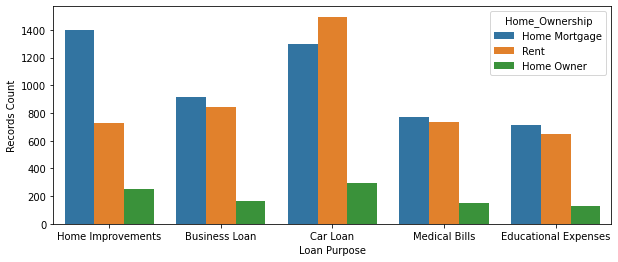

In [ ]:
plt.rcParams["figure.figsize"] = [10, 4]
loan_purpose = data.loc[data["Purpose"] != "Home Loan"]
sns.countplot(x = "Purpose", hue="Home_Ownership", data=loan_purpose)
plt.xlabel("Loan Purpose")
plt.ylabel("Records Count")

### Findings

> Among those who rent, the most common loan type is a Car Loan compared to those who have a mortgage most commonly have a loan for Home Improvements followed by a Car Loan. Home owners have the least amount of loans taken out in general. Their most common loan is a Car Loan however, the other loan types don't fall far behind.

> This lender seems to give out more Car Loans in total than any other loan type.

## 3. Does credit score improve over time? Do those with longer credit history have higher credit scores?

Text(0, 0.5, 'Credit Score')

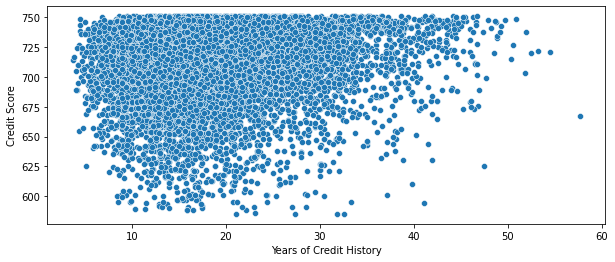

In [ ]:
sns.scatterplot(x=data['Years_of_Credit_History'], y=data['Credit_Score'])
plt.xlabel("Years of Credit History")
plt.ylabel("Credit Score")

### Findings
> The data does not seem to have a strong relationship between the amount of years with credit history and their credit score. The scatterplot shows a weak positive correlation. It isnt until about 40 years of history that we see more records with higher credit scores; any amount of years before that is highly unpredicatable. It is not guaranteed that time will improve credit score.

## 4. What are the portions of each loan purpose category? Which Purpose type are the most common and least common?

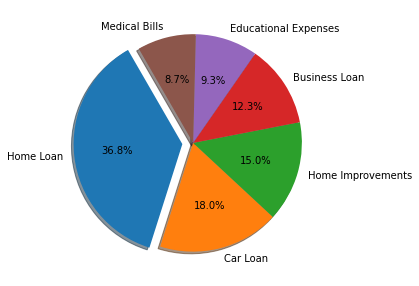

In [ ]:
plt.rcParams["figure.figsize"] = [5, 5]
purpose_counts = data['Purpose'].value_counts()
plt.pie(purpose_counts, labels=purpose_counts.index, shadow = True, autopct='%1.1f%%', explode= (0.1, 0, 0, 0, 0, 0), startangle=120)
plt.show()

### Findings
> The lender of the data set lends out the most Home Loans than any other type of loan. The top 3 types of loans are Home, Car, and Home Improvement loans that make up 68% of the data set. This is compared to the least common Business, Medical, and Educational loans. The pie chart demonstates those in the data set file to borrow money for perpetual voluntary reasons. 

# Feature Engineering


> The Credit_Cards_Balance is important as it adds to the amount borrowed however, the Credit_Cards_Limit column is only relevant as it relates to the credit card balances. The limit column will be converted into a percentage of credit utilization as lenders this in count in the real world.

In [ ]:
limit = data["Credit_Cards_Limit"]
data["Credit_Utilization"] = round((data["Credit_Cards_Balance"] / data["Credit_Cards_Limit"]) * 100, 2)
data["Credit_Utilization"].replace(to_replace = [float('inf'), np.nan], value = 0, inplace=True)

display(data.head(3))

,Loan_Amount,Term,Interest_Rate,Credit_Score,Years_in_Current_Job,Home_Ownership,Annual_Income,Purpose,Monthly_Debt,Years_of_Credit_History,Credit_Cards_Balance,Credit_Cards_Limit,Credit_Risk,Credit_Utilization
0,6966,1 year,8.010,673,1 year or less,Home Mortgage,54736.0,Home Improvements,839.28,16.4,2942,3881,1,75.81
2,5878,1 year,5.570,743,1 year or less,Home Mortgage,107767.0,Home Improvements,1420.73,24.6,35963,89459,0,40.20
4,1010,1 year,6.435,745,1 year or less,Home Mortgage,75713.0,Home Improvements,1242.95,18.0,769,17889,0,4.30


> Since there was a very weak correlation between Years_of_Credit_History and Credit_Score then it seems to be not impactful enough and can be removed entirely from the model. The same concern would apply to Years_in_Current_Job.



In [ ]:
data = data.drop(columns = ['Years_in_Current_Job', 'Years_of_Credit_History', 'Credit_Cards_Limit'])
display(data.columns)

Index(['Loan_Amount', 'Term', 'Interest_Rate', 'Credit_Score',
       'Home_Ownership', 'Annual_Income', 'Purpose', 'Monthly_Debt',
       'Credit_Cards_Balance', 'Credit_Risk', 'Credit_Utilization'],
      dtype='object')

# Train Test Split
> The dataset comprises of 15,787 records that have remained after inital data clean up (prevent data leakage). The split will be 70/30 split where the Training set is 70% with 11,050 entries and the Testing set will include 30% of the data set with the remaining 4,737 entries. 

Remove Credit_Risk predicted column Train/Test Split 


In [ ]:
risk_col = 'Credit_Risk'
display(data.describe())
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=risk_col), data[risk_col],
                                                   test_size=0.3, random_state=2345, stratify=data[risk_col])

,Loan_Amount,Interest_Rate,Credit_Score,Annual_Income,Monthly_Debt,Credit_Cards_Balance,Credit_Risk,Credit_Utilization
count,1.578700e+04,15787.000000,15787.000000,15787.000000,15787.000000,15787.000000,15787.000000,15787.000000
mean,8.051086e+04,5.480135,715.703870,71904.597074,974.673670,15525.625198,0.243175,55.603727
std,5.794124e+05,1.610655,28.708938,46535.648443,637.055557,19066.021805,0.429013,21.938592
min,5.110000e+02,2.410000,585.000000,4033.000000,0.000000,0.000000,0.000000,0.000000
25%,1.173900e+04,3.950000,702.000000,44500.500000,540.145000,6015.500000,0.000000,46.250000
50%,2.390900e+04,5.495000,722.000000,61458.000000,854.320000,11085.000000,0.000000,50.000000
75%,1.013960e+05,6.675000,738.000000,86650.500000,1261.565000,19473.500000,0.000000,71.400000
max,6.998809e+07,11.055000,751.000000,968430.000000,9119.240000,683524.000000,1.000000,366.530000


In [ ]:
# X Train
print('On X train ', X_train.shape)
display(X_train.sample(2))
# Y Train
print('\nOn y train ', y_train.shape)
display(y_train.sample(2))

# X test
print('\n\n\nOn X test ', X_test.shape)
display(X_test.sample(2))
# Y test
print('\nOn y test ', y_test.shape)
display(y_test.sample(2))

On X train  (11050, 10)


,Loan_Amount,Term,Interest_Rate,Credit_Score,Home_Ownership,Annual_Income,Purpose,Monthly_Debt,Credit_Cards_Balance,Credit_Utilization
16752,2458,1 year,5.185,738,Rent,40303.0,Educational Expenses,812.77,8009,48.5
20590,19858,7 year,2.710,721,Rent,46666.0,Car Loan,595.00,19193,84.8



On y train  (11050,)


10749    0
14906    0
Name: Credit_Risk, dtype: int64




On X test  (4737, 10)


,Loan_Amount,Term,Interest_Rate,Credit_Score,Home_Ownership,Annual_Income,Purpose,Monthly_Debt,Credit_Cards_Balance,Credit_Utilization
7219,9796,1 year,6.345,716,Rent,68572.0,Home Improvements,306.86,4436,30.00
94,2521,1 year,7.995,739,Rent,27230.0,Car Loan,242.80,3137,62.18



On y test  (4737,)


5522    0
9598    0
Name: Credit_Risk, dtype: int64

# ML Pipeline
> The pipeline will involve preprocessing steps of the data and defining Transforms and Estimators on the training data. The next pipe will involve trial and error of different models to find the best performing one. Pipes to consider are caching calculations when appropiate througout the pipeline as intermediate steps for grid search and model fitting. The pipeline may need to Tranform targets of the model.

## Establishing the training pipeline

> **Note: There will be no data imputed**  
In the data clean up step, the were 3 columns with NA values. This included Credit_Score, Annual_Income, and Years_in_Current_Job. All records with NA entries for Credit_Score contained all NA entries for Annual_Income. I dropped these records because credit score plays a major part in determining if a record is at risk or not, the median credit score may sway the model to predict the record as not a credit risk and in result would lower the models accuracy. Years in current job has since been dismissed.

Creating individual pipelines for numerical and categorical columns

In [ ]:
cat_pipeline = Pipeline(steps=[('onehot_cat', OneHotEncoder())])
num_pipeline = Pipeline(steps=[('scale_num', StandardScaler())])

preproc = ColumnTransformer([('cat_pipe', cat_pipeline, make_column_selector(dtype_include=object)),
                             ('num_pipe', num_pipeline, make_column_selector(dtype_include=np.number))],
                             remainder='passthrough')

> The pipeline will train a GradientBoostingClassifier model

In [ ]:
#generate the whole modeling pipeline with preprocessing
pipe = Pipeline(steps=[('preproc', preproc), ('mdl', GradientBoostingClassifier(
                n_estimators=100, learning_rate=1.0, max_depth=2, random_state=0))]) 

#visualization for steps
with config_context(display='diagram'):
    display(pipe)

Pipeline(steps=[('preproc',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_pipe',
                                                  Pipeline(steps=[('onehot_cat',
                                                                   OneHotEncoder())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f4a8b78d710>),
                                                 ('num_pipe',
                                                  Pipeline(steps=[('scale_num',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f4a8b78fc50>)])),
                ('mdl',
                 GradientBoostingClassifier(learning_rate=1.0, max_depth=2,
                                            random_state=0))])

## Cross-validation with hyperparameter tuning

In [ ]:
#hyperparameter tuning
tuning_grid = {'mdl__learning_rate' : [0.1,1,10,50], 'mdl__max_depth': [1,2,3,4],
               "mdl__n_estimators": [100, 200, 300, 400]}
# GridSearchCV is used for cross-validation
grid_search = GridSearchCV(pipe, param_grid = tuning_grid, cv = 5, return_train_score=True)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preproc',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('cat_pipe',
                                                                         Pipeline(steps=[('onehot_cat',
                                                                                          OneHotEncoder())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f4a8b78d710>),
                                                                        ('num_pipe',
                                                                         Pipeline(steps=[('scale_num',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose.

In [ ]:
print(grid_search.best_score_)
grid_search.best_params_

0.799366515837104


{'mdl__learning_rate': 0.1, 'mdl__max_depth': 2, 'mdl__n_estimators': 300}

In [ ]:
pd.DataFrame(grid_search.cv_results_).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_mdl__learning_rate,param_mdl__max_depth,param_mdl__n_estimators,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.980036,0.030046,0.010253,0.000313,0.1,1,100,"{'mdl__learning_rate': 0.1, 'mdl__max_depth': ...",0.763348,0.766063,...,0.764072,0.002769,32,0.766855,0.766855,0.772059,0.762896,0.767081,0.767149,0.002911
1,1.872928,0.006315,0.012148,0.000784,0.1,1,200,"{'mdl__learning_rate': 0.1, 'mdl__max_depth': ...",0.785520,0.780995,...,0.783348,0.006344,20,0.787104,0.787330,0.789819,0.784615,0.788122,0.787398,0.001686
2,2.806561,0.015571,0.013435,0.000160,0.1,1,300,"{'mdl__learning_rate': 0.1, 'mdl__max_depth': ...",0.799548,0.780543,...,0.788688,0.008210,18,0.795023,0.797738,0.799548,0.796267,0.795023,0.796719,0.001732
3,3.737024,0.011364,0.014773,0.000420,0.1,1,400,"{'mdl__learning_rate': 0.1, 'mdl__max_depth': ...",0.799095,0.784163,...,0.790045,0.006644,17,0.799095,0.801923,0.803846,0.799434,0.801471,0.801154,0.001740
4,1.668085,0.013675,0.011192,0.000204,0.1,2,100,"{'mdl__learning_rate': 0.1, 'mdl__max_depth': ...",0.801810,0.793213,...,0.796471,0.005050,8,0.809163,0.809163,0.809615,0.807466,0.808710,0.808824,0.000737


## Model fitting and Evaluation

### Assumptions 

 > 1. Because the most common purpose type is Home Loan, the model will be aided to perform at a higher accuracy because there is more data in that category to discern a pattern and will also have more records to predict based on that pattern which will overall add to the correct predictions count.



Final fit 

In [ ]:
grid_search.best_estimator_

Pipeline(steps=[('preproc',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_pipe',
                                                  Pipeline(steps=[('onehot_cat',
                                                                   OneHotEncoder())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f4a8b72e350>),
                                                 ('num_pipe',
                                                  Pipeline(steps=[('scale_num',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f4a8b72e0d0>)])),
                ('mdl',
                 GradientBoostingClassifier(max_depth=2, n_estimators=300,
                                            random_state=0))])

### Variable Importance 

In [127]:
vip = grid_search.best_estimator_['mdl'].feature_importances_
vip

array([1.37710835e-01, 1.40414331e-02, 1.69031455e-04, 6.35364173e-03,
       3.29268304e-02, 0.00000000e+00, 4.54400090e-03, 8.08320249e-06,
       0.00000000e+00, 0.00000000e+00, 8.99030446e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 7.68868498e-03,
       1.83113129e-01, 4.51258693e-03, 1.64781273e-01, 1.86049642e-01,
       1.14653950e-01, 1.28002358e-01, 6.45421562e-03])

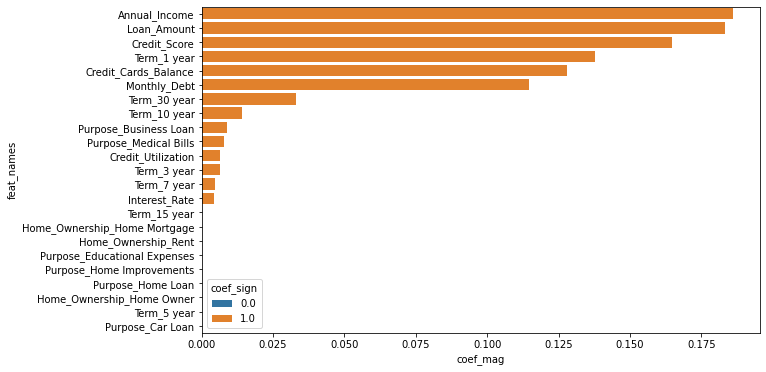

In [136]:
#get names in correct preproc order
cat_names = grid_search.best_estimator_.named_steps['preproc'].transformers_[0][1].named_steps['onehot_cat'].get_feature_names_out()
num_names = grid_search.best_estimator_.named_steps['preproc'].transformers_[1][2]

#create df with vip info
coef_info = pd.DataFrame({'feat_names':np.hstack([cat_names, num_names]), 'vip': vip})

#get sign and magnitude information
coef_info = coef_info.assign(coef_mag = abs(coef_info['vip']),
                             coef_sign = np.sign(coef_info['vip']))

#sort and plot
coef_info = coef_info.set_index('feat_names').sort_values(by='coef_mag', ascending=False)
sns.barplot(y=coef_info.index, x='coef_mag', hue='coef_sign', data=coef_info, orient='h', dodge=False);
plt.rcParams["figure.figsize"] = [10, 6]

### Performance metrics

In [ ]:
print(classification_report(y_test, grid_search.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

           0       0.82      0.92      0.86      3585
           1       0.58      0.35      0.44      1152

    accuracy                           0.78      4737
   macro avg       0.70      0.64      0.65      4737
weighted avg       0.76      0.78      0.76      4737



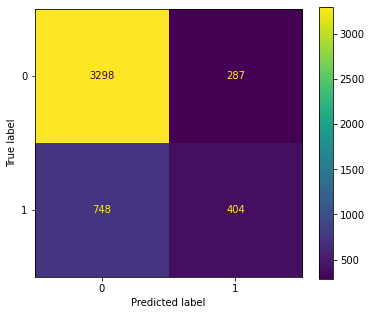

In [141]:
cm = confusion_matrix(y_test, grid_search.best_estimator_.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=grid_search.classes_)
disp.plot()
plt.rcParams["figure.figsize"] = [6, 5]
plt.show()

> The Gradient Boosting model performs well on predicting those who are not a credit risk but, performed okay on predicting those who are a credit risk. This prompts adjustment or changing models

### ROC_curve

Best Threshold=0.215241 
Net Gain=0.521


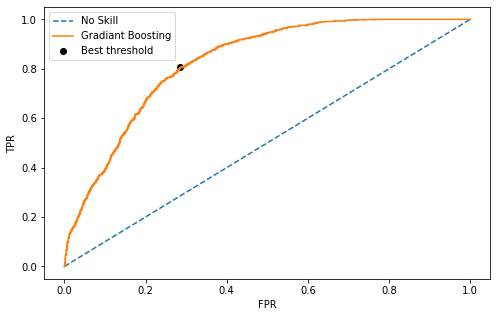

In [ ]:
y_pred = grid_search.predict_proba(X_test)
y_pred = y_pred[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
net_gain = tpr - fpr
ix = np.argmax(net_gain)
print('Best Threshold=%f \nNet Gain=%.3f' % (thresholds[ix], net_gain[ix]))
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best threshold')
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Gradiant Boosting', markersize= 0.5)


plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()

plt.rcParams["figure.figsize"] = [8, 5]
plt.show()

### Precision_Recall_curve

Best Threshold=0.253279 
f1 score=0.601


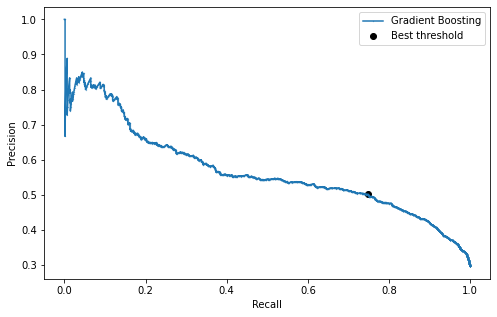

In [125]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
f1 = 2 * ((precision * recall) / (precision + recall))
ix = np.argmax(f1)

print('Best Threshold=%f \nf1 score=%.3f' % (thresholds[ix], f1[ix]))

plt.plot(recall, precision, marker='.', label='Gradient Boosting', markersize= 0.5)
plt.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best threshold')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()